In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
np.random.choice([1,2,3,4,5],3) #chooses 2 numbers randomly from the list

array([5, 2, 5])

In [7]:
#generating Data

/Users/guptadhruv51/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
/Users/guptadhruv51/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


(500, 2)

In [43]:
m1,cov1=[15,8],[[1,2],[2,1]]
m2,cov2=[8,10],[[2,-1],[-1,2]]
m3,cov3=[3,7],[[0,1],[-1,0]]
data1=np.random.multivariate_normal(m1,cov1,350)
data2=np.random.multivariate_normal(m2,cov2,350)
data3=np.random.multivariate_normal(m3,cov3,300)
X=np.vstack((data1,np.vstack((data2,data3))))
np.random.shuffle(X)
X.shape



/Users/guptadhruv51/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
/Users/guptadhruv51/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


(1000, 2)

In [44]:
def kmeans(X,k,max_iter=1000):    #k=no of clusters
    m=X.shape[0]
    centroids=X[np.random.choice(np.arange(m),k)]  #choose k random centers from X
    for i in range(max_iter):
        C=[]    #saves the centroid for every training example
        for x in X:
               
            distances=[]
            for c in centroids:
                d=np.dot(x-c,x-c)   #L2 distance
                distances.append(d)
            ci=np.argmin(distances) #gives the index of the nearest centroid
            C.append(ci) #adds the centroid number which is closest to training example
        #OR
        #C=np.argmin([np.dot(x-c,x-c) for c in centrods] for x in X)
        C=np.asarray(C)
        
        centroids=[X[C==ci].mean(axis=0) for ci in range(k)]    #creates clusters based on the mean
                                                       #when ci is 0 the training examples closest to C  
    return np.asarray(centroids),C      #C contains centre no and centroids contains the mean of clusters  

In [45]:
centroids,C=kmeans(X,k=3)
print(centroids)
print(C.shape)

[[ 7.98528105  9.95050492]
 [ 3.05200707  6.94938378]
 [14.92050804  8.02143363]]
(1000,)


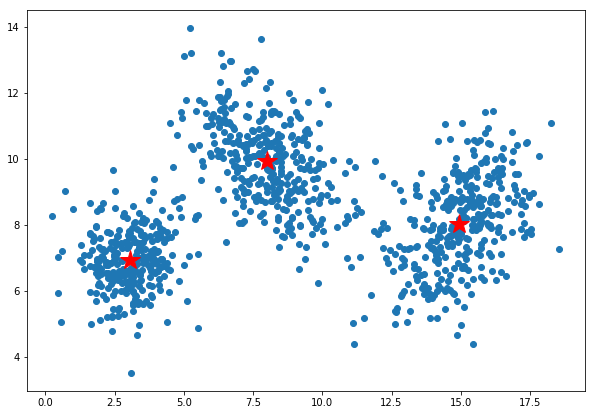

In [46]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1])
plt.plot(centroids[:,0],centroids[:,1],'r*',markersize=20)
plt.show()

In [42]:
print(centroids.shape)

(3, 2)
